<a href="https://colab.research.google.com/github/chibbk/ColabRNN/blob/main/RNNFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo tensorflow

In [6]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1085/1085 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 7684300.5000 - val_loss: 3606173.0000
Epoch 2/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 3482204.7500 - val_loss: 3453455.2500
Epoch 3/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 3183395.0000 - val_loss: 1838835.5000
Epoch 4/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1587288.6250 - val_loss: 1364424.8750
Epoch 5/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1273807.6250 - val_loss: 1188466.8750
Epoch 6/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1128096.0000 - val_loss: 1075523.3750
Epoch 7/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1044822.1875 - val_loss: 1011210.8125
Epoch 8/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 1002012.3750 - val_loss: 969781.9375
Epoch 9/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 970231.6875 - val_loss: 972043.3750
Epoch 10/50
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 940583.6250 - val_loss: 931790.1250
Epoch 11/50
10

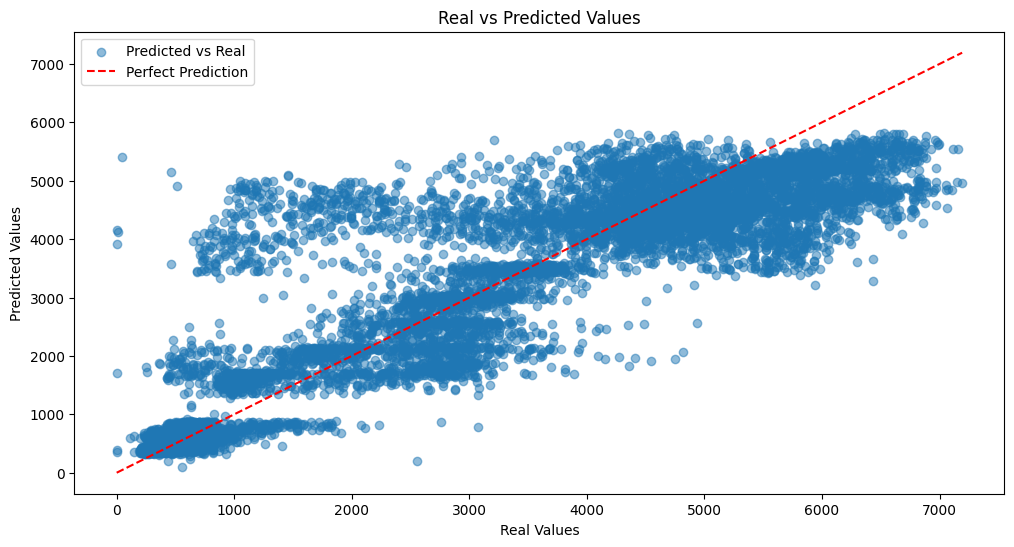

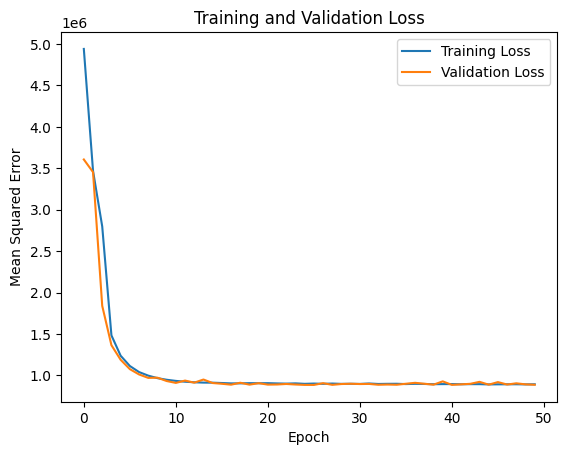

In [27]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import tensorflow as tf


# Read dataset
data = fetch_ucirepo(id=492)

# Convert features and targets to DataFrames
X = pd.DataFrame(data.data.features)
y = pd.DataFrame(data.data.targets, columns=['traffic_volume'])



if 'date_time' in X.columns:
    X['date_time'] = pd.to_datetime(X['date_time'])
    X['hour'] = X['date_time'].dt.hour
    X = X.drop('date_time', axis=1)

# Preprocessing
# Convert categorical features to numeric
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Define features and target
X = X.values
y = y.values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Reshape for RNN input
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.SimpleRNN(50, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(25, activation='relu', return_sequences=True),
    tf.keras.layers.SimpleRNN(10, activation='relu'),  #Multiple RNN layers
    tf.keras.layers.Dense(1)
])



model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
MSE = model.evaluate(X_test, y_test)
print(f'Test MSE: {MSE}')

# Make predictions
y_pred = model.predict(X_test)

# Plot real vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Real')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real vs Predicted Values')
plt.legend()
plt.show()

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()